 In this work, we will follow these 7 steps to figure out top 10 neighbourhoods in Calgary to live based on `Number of bus stops`, `Crime Rate`, `Number of Parks` and `Number of Restaurants`:
 
     1. Scraping Calgary Neighbourhoods
     2. Scraping the latitude and longitude of each neighbourhood in Calgary
     3. Preprocessing Transportation dataset 
     4. Calculating Number of Stops per Neighbourhood
     5. Preprocessing Crime dataset 
     6. Scraping Foursquare dataset for Restaurants and Parks
     7. Analyzing Final Dataframe 

# 1- Scraping Calgary Neighbourhoods

I scraped Calgary neighbourhoods using `Wikipedia` websit: `https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Calgary`

In [1]:
#from IPython.display import display_html
import pandas as pd
import numpy as np
#import geocoder

In [2]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Calgary', header=0)
df = dfs[0]
df.head()

,Name[9],Quadrant,Sector[10],Ward[11],Type[10],2012 PopulationRank,Population(2012)[9],Population(2011)[9],% change,Dwellings(2012)[9],Area(km2)[10],Populationdensity
0,Abbeydale,NE/SE,Northeast,10,Residential,82,5917.0,5700.0,3.8,2023.0,1.7,3480.6
1,Acadia,SE,South,9,Residential,27,10705.0,10615.0,0.8,5053.0,3.9,2744.9
2,Albert Park/Radisson Heights,SE,East,10,Residential,75,6234.0,6217.0,0.3,2709.0,2.5,2493.6
3,Altadore,SW,Centre,11,Residential,39,9116.0,8907.0,2.3,4486.0,2.9,3143.4
4,Alyth/Bonnybrook,SE,Centre,9,Industrial,208,16.0,17.0,−5.9,14.0,3.8,4.2


In [3]:
df.drop(['Sector[10]','Ward[11]','2012 PopulationRank','Population(2012)[9]','Population(2011)[9]','% change','Dwellings(2012)[9]','Populationdensity'], axis = 1 ,inplace=True)
df.rename(columns={"Name[9]": "Neighbourhood", "Type[10]": "Type" , 'Area(km2)[10]':'Area'},inplace=True)
df = df[:-1]
df.head()

,Neighbourhood,Quadrant,Type,Area
0,Abbeydale,NE/SE,Residential,1.7
1,Acadia,SE,Residential,3.9
2,Albert Park/Radisson Heights,SE,Residential,2.5
3,Altadore,SW,Residential,2.9
4,Alyth/Bonnybrook,SE,Industrial,3.8


In [4]:
df.shape

(257, 4)

Droping all the `NaN` values after getting the dataframe

In [5]:
df.dropna(inplace=True)
df.shape

/Users/vesal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(241, 4)

Removing any other types from neighbourhoods in order to only keep `Residential`, and also removing `University of Calgary` neighbourhood since it is not residential.

In [6]:
df = df[df.Type == 'Residential']
df = df[df.Neighbourhood != 'University of Calgary']
df.head()

,Neighbourhood,Quadrant,Type,Area
0,Abbeydale,NE/SE,Residential,1.7
1,Acadia,SE,Residential,3.9
2,Albert Park/Radisson Heights,SE,Residential,2.5
3,Altadore,SW,Residential,2.9
5,Applewood Park,SE/NE,Residential,1.6


Reindexing the dataframe

In [7]:
df.reset_index(inplace=True)
df.drop(['index'] , axis=1,inplace=True)
#df.drop(['level_0'], axis=1, inplace=True)
df.tail()

,Neighbourhood,Quadrant,Type,Area
189,Willow Park,SE,Residential,3.4
190,Windsor Park,SW,Residential,1.3
191,Winston Heights/Mountview,NE,Residential,3.0
192,Woodbine,SW,Residential,3.2
193,Woodlands,SW,Residential,2.8


# 2- Scraping the latitude and longitude of each neighbourhood in Calgary

I used `Google` search module to find `Wikipedia` website of each neighbourhood and then scrape the latitude and longitude to add to the dataframe.

In [8]:
# !pip install beautifulsoup4
# !pip install google
try: 
    from googlesearch import search 
except ImportError:  
    print("No module named 'google' found") 

Requesting the Google for `"{} calgary alberta coordinates"` to find the `Wikipedia` link as the result

In [9]:
urls =[]

#to search 
for neigh in df.Neighbourhood:
    print('Neighbourhood Is :' , neigh)
    query = "{} calgary alberta coordinates".format(neigh)
    for link in search(query, tld="ca", num=1, stop=6, pause=2):
        if link.find('https://en.wikipedia.org/'):
            print('WIKIPEDIA LINK NOT FOUND')
        else:
            print('WIKIPEDIA LINK FOUND:',link)
            urls.append(link)
            break
    print('-'*20)

Neighbourhood Is : Abbeydale
WIKIPEDIA LINK NOT FOUND
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Abbeydale,_Calgary
--------------------
Neighbourhood Is : Acadia
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Acadia,_Calgary
--------------------
Neighbourhood Is : Albert Park/Radisson Heights
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Radisson_Heights,_Calgary
--------------------
Neighbourhood Is : Altadore
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Altadore,_Calgary
--------------------
Neighbourhood Is : Applewood Park
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Applewood_Park,_Calgary
--------------------
Neighbourhood Is : Arbour Lake
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Arbour_Lake,_Calgary
--------------------
Neighbourhood Is : Aspen Woods
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Aspen_Woods,_Calgary
--------------------
Neighbourhood Is : Auburn Bay
WIKIPEDIA LINK NOT FOUND
WIKIPEDIA LINK NOT FOUND
WIKIPEDIA LI

WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Evanston,_Calgary
--------------------
Neighbourhood Is : Evergreen
WIKIPEDIA LINK NOT FOUND
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Evergreen,_Calgary
--------------------
Neighbourhood Is : Fairview
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Fairview,_Calgary
--------------------
Neighbourhood Is : Falconridge
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Falconridge,_Calgary
--------------------
Neighbourhood Is : Forest Heights
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Forest_Lawn,_Calgary
--------------------
Neighbourhood Is : Forest Lawn
WIKIPEDIA LINK NOT FOUND
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Forest_Lawn,_Calgary
--------------------
Neighbourhood Is : Glamorgan
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Glamorgan,_Calgary
--------------------
Neighbourhood Is : Glenbrook
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Glenbrook,_Calgary
--------------------

WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Pineridge,_Calgary
--------------------
Neighbourhood Is : Point Mckay
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Point_Mckay,_Calgary
--------------------
Neighbourhood Is : Pump Hill
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Pump_Hill,_Calgary
--------------------
Neighbourhood Is : Queens Park Village
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Highland_Park,_Calgary
--------------------
Neighbourhood Is : Queensland
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Queensland,_Calgary
--------------------
Neighbourhood Is : Ramsay
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Ramsay,_Calgary
--------------------
Neighbourhood Is : Ranchlands
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Ranchlands,_Calgary
--------------------
Neighbourhood Is : Red Carpet
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Red_Carpet,_Calgary
--------------------
Neighbourhood Is : Redstone
WIKIPEDIA LINK 

WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Windsor_Park,_Calgary
--------------------
Neighbourhood Is : Winston Heights/Mountview
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Winston_Heights-Mountview,_Calgary
--------------------
Neighbourhood Is : Woodbine
WIKIPEDIA LINK NOT FOUND
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Woodbine,_Calgary
--------------------
Neighbourhood Is : Woodlands
WIKIPEDIA LINK FOUND: https://en.wikipedia.org/wiki/Woodlands,_Calgary
--------------------


In [11]:
df.shape

(194, 4)

Scraping data from `Wikipedia` links

In [12]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re

import warnings
warnings.filterwarnings(action="once")

In [13]:
lat=[]
long=[]

for link in urls:
    print(link, 'WIKI')
    html=requests.get(link, verify=False).text

    soup = BeautifulSoup(html, 'lxml')

    for row in soup.find('span',class_="latitude"):
        print(row)
        coordinate = str(row)
        try:
            deg, minutes, seconds, direction =  re.split('[°\′″]', row)
            lat.append((float(deg) + float(minutes)/60 + float(seconds)/(60*60)) * (-1 if direction in ['W', 'S'] else 1))
        except:
            deg, minutes, direction =  re.split('[°\′]', row)
            lat.append((float(deg) + float(minutes)/60) * (-1 if direction in ['W', 'S'] else 1))

    for row in soup.find('span',class_="longitude"):
        print(row)
        coordinate = str(row)
        try:
            deg, minutes, seconds, direction =  re.split('[°\′″]', row)
            long.append((float(deg) + float(minutes)/60 + float(seconds)/(60*60)) * (-1 if direction in ['W', 'S'] else 1))
        except:
            deg, minutes, direction =  re.split('[°\′]', row)
            long.append((float(deg) + float(minutes)/60) * (-1 if direction in ['W', 'S'] else 1))

https://en.wikipedia.org/wiki/Abbeydale,_Calgary WIKI


/Users/vesal/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


51°03′39″N
113°55′40″W
https://en.wikipedia.org/wiki/Acadia,_Calgary WIKI
50°58′02″N
114°03′33″W
https://en.wikipedia.org/wiki/Radisson_Heights,_Calgary WIKI
51°02′44″N
113°59′22″W
https://en.wikipedia.org/wiki/Altadore,_Calgary WIKI
51°01′05″N
114°06′02″W
https://en.wikipedia.org/wiki/Applewood_Park,_Calgary WIKI
51°02′41″N
113°55′42″W
https://en.wikipedia.org/wiki/Arbour_Lake,_Calgary WIKI
51°08′00″N
114°12′16″W
https://en.wikipedia.org/wiki/Aspen_Woods,_Calgary WIKI
51°02′36″N
114°11′36″W
https://en.wikipedia.org/wiki/Auburn_Bay,_Calgary WIKI
50°53′07″N
113°57′50″W
https://en.wikipedia.org/wiki/Banff_Trail,_Calgary WIKI
51°04′31″N
114°06′46″W
https://en.wikipedia.org/wiki/Bankview,_Calgary WIKI
51°02′06″N
114°05′57″W
https://en.wikipedia.org/wiki/Bayview,_Calgary WIKI
50°58′31″N
114°06′52″W
https://en.wikipedia.org/wiki/Beddington_Heights,_Calgary WIKI
51°07′39″N
114°04′37″W
https://en.wikipedia.org/wiki/Bel-Aire,_Calgary WIKI
50°59′58″N
114°05′17″W
https://en.wikipedia.org/wiki/Bel

50°54′49″N
113°58′9″W
https://en.wikipedia.org/wiki/Meadowlark_Park,_Calgary WIKI
50°59′52″N
114°04′39″W
https://en.wikipedia.org/wiki/Midnapore,_Calgary WIKI
50°54′56″N
114°03′22″W
https://en.wikipedia.org/wiki/Millrise,_Calgary WIKI
50°55′06″N
114°05′05″W
https://en.wikipedia.org/wiki/Mission,_Calgary WIKI
51°01′55″N
114°04′12″W
https://en.wikipedia.org/wiki/Monterey_Park,_Calgary WIKI
51°04′54″N
113°55′44″W
https://en.wikipedia.org/wiki/Montgomery,_Calgary WIKI
51°04′38″N
114°09′34″W
https://en.wikipedia.org/wiki/Mount_Pleasant,_Calgary WIKI
51°04′21″N
114°04′35″W
https://en.wikipedia.org/wiki/New_Brighton,_Calgary WIKI
50°55′17″N
113°57′09″W
https://en.wikipedia.org/wiki/Nolan_Hill WIKI
51°10′30″N
114°09′36″W
https://en.wikipedia.org/wiki/North_Glenmore,_Calgary WIKI
51°00′14″N
114°06′43″W
https://en.wikipedia.org/wiki/North_Haven,_Calgary WIKI
51°05′46″N
114°05′24″W
https://en.wikipedia.org/wiki/North_Haven,_Calgary WIKI
51°05′46″N
114°05′24″W
https://en.wikipedia.org/wiki/Oakridg

Adding `latitude` and `longitude` to the dataframe

In [14]:
df['latitude'] =np.nan
df['longitude'] =np.nan

counter = 0
for i in range(df.shape[0]):
    df['latitude'].iloc[i] = lat[counter] 
    counter += 1
    
counter = 0    
for i in range(df.shape[0]):
    df['longitude'].iloc[i] = long[counter] 
    counter += 1
df.head()

/Users/vesal/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Neighbourhood,Quadrant,Type,Area,latitude,longitude
0,Abbeydale,NE/SE,Residential,1.7,51.060833,-113.927778
1,Acadia,SE,Residential,3.9,50.967222,-114.059167
2,Albert Park/Radisson Heights,SE,Residential,2.5,51.045556,-113.989444
3,Altadore,SW,Residential,2.9,51.018056,-114.100556
4,Applewood Park,SE/NE,Residential,1.6,51.044722,-113.928333


Making sure that the points is showing Calgary area.

In [15]:
import scipy.spatial as spatial
import matplotlib.pyplot as plt
import matplotlib.path as path
import matplotlib as mpl
import smopy
%matplotlib inline

/Users/vesal/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/vesal/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


Lowered zoom level to keep map size reasonable. (z = 11)


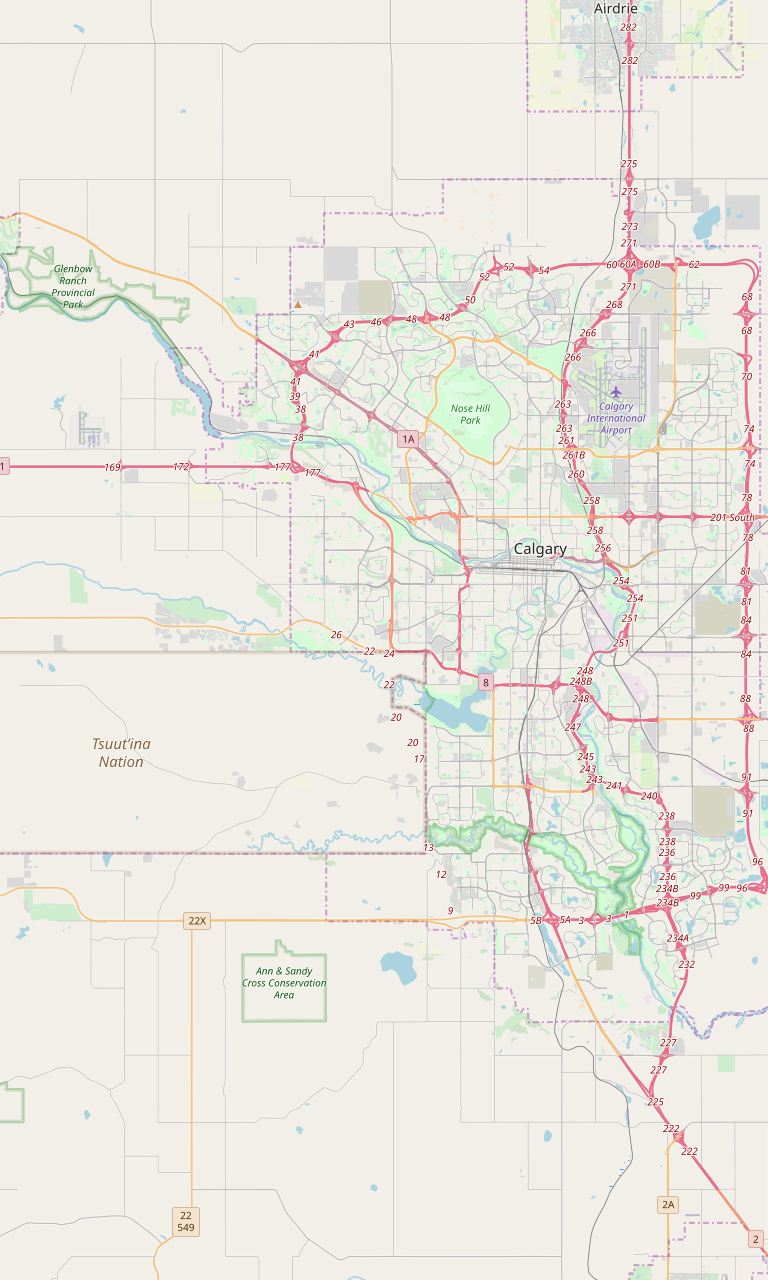

In [16]:
box = (df.latitude.min(), df.longitude.min(),
       df.latitude.max(), df.longitude.max())
m = smopy.Map(box, z=12)
m.show_ipython()

# 3- Preprocessing Transportation dataset 

By accessing Calgary Transit Scheduling Data: 

https://data.calgary.ca/Transportation-Transit/Calgary-Transit-Scheduling-Data/npk7-z3bj

I cleaned and prepared the data to have number of stops per neighbourhood.

Loading and cleaning dataset

In [17]:
stop_df = pd.read_csv('CT_GTFS/stops.txt', sep=",", header=0)
stop_df.drop(['stop_id','stop_code','stop_desc' , 'zone_id' , 'stop_url' , 'location_type'],axis=1,inplace=True)
stop_df.head()

,stop_name,stop_lat,stop_lon
0,Crescent Heights High School,51.060931,-114.065158
1,NB Country Village LI south of Country Village Rd,51.158297,-114.067642
2,NB 26 ST SE @ 85 AV SE,50.977377,-113.998751
3,NB 69 ST SW @ Elmont DR,51.028872,-114.187317
4,SB 69 ST SW @ Elmont DR,51.028489,-114.187737


Having stop points based on the `latitude` and `longitude` of each stop

In [18]:
stop_point = []
for i in range(stop_df.shape[0]):
    p = [stop_df.stop_lat.iloc[i],stop_df.stop_lon.iloc[i]]
    stop_point.append(p)
stop_points = np.array(stop_point)
stop_points

array([[  51.060931, -114.065158],
       [  51.158297, -114.067642],
       [  50.977377, -113.998751],
       ...,
       [  51.106221, -114.158316],
       [  50.976257, -113.95824 ],
       [  50.997509, -114.013415]])

# 4- Calculating Number of Stops per Neighbourhood

In this section, I used `Voronoi` Diagram. 

The `Voronoi` diagram of a set of seed points divides space into several regions. Each region contains all points closer to one seed point than to any other seed point.

I used this diagram to find each stop in each neighbourhood using `latitude` and `longitude` of each neighbourhood.

You can read more about `Voronoi` Diagram via SciPy here: 

https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.Voronoi.html

In [19]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]

In [21]:
neigh_point = []
ind = []
for i in range(df.shape[0]):
    p = [df.latitude.iloc[i],df.longitude.iloc[i]]
    ind.append(i)
    neigh_point.append(p)
neigh_points = np.array(neigh_point)

In [22]:
vor = Voronoi(neigh_points)

In [23]:
for i, reg in enumerate(vor.regions):
    try:
        print ('Region:', i)
        print ('Indices of vertices of Voronoi region:', reg)
        print ('Associated point:', neigh_points[i])
        print ('Neighbourhood is:' , df.Neighbourhood.iloc[ind[i]])
        print('-'*25)
    except:
        pass

Region: 0
Indices of vertices of Voronoi region: [11, -1, 1, 9]
Associated point: [  51.06083333 -113.92777778]
Neighbourhood is: Abbeydale
-------------------------
Region: 1
Indices of vertices of Voronoi region: [17, 13, 15, 14, 16]
Associated point: [  50.96722222 -114.05916667]
Neighbourhood is: Acadia
-------------------------
Region: 2
Indices of vertices of Voronoi region: [15, 12, 10, 9, 11, 14]
Associated point: [  51.04555556 -113.98944444]
Neighbourhood is: Albert Park/Radisson Heights
-------------------------
Region: 3
Indices of vertices of Voronoi region: [16, -1, 11, 14]
Associated point: [  51.01805556 -114.10055556]
Neighbourhood is: Altadore
-------------------------
Region: 4
Indices of vertices of Voronoi region: [23, 19, 18, 21, 20, 22]
Associated point: [  51.04472222 -113.92833333]
Neighbourhood is: Applewood Park
-------------------------
Region: 5
Indices of vertices of Voronoi region: [22, -1, 0, 20]
Associated point: [  51.13333333 -114.20444444]
Neighbourh

As it is shown in the plot, each neighbourhood is specified with a color, and the `latitude` and `longitude` point of each section if specified with its specific point in it.

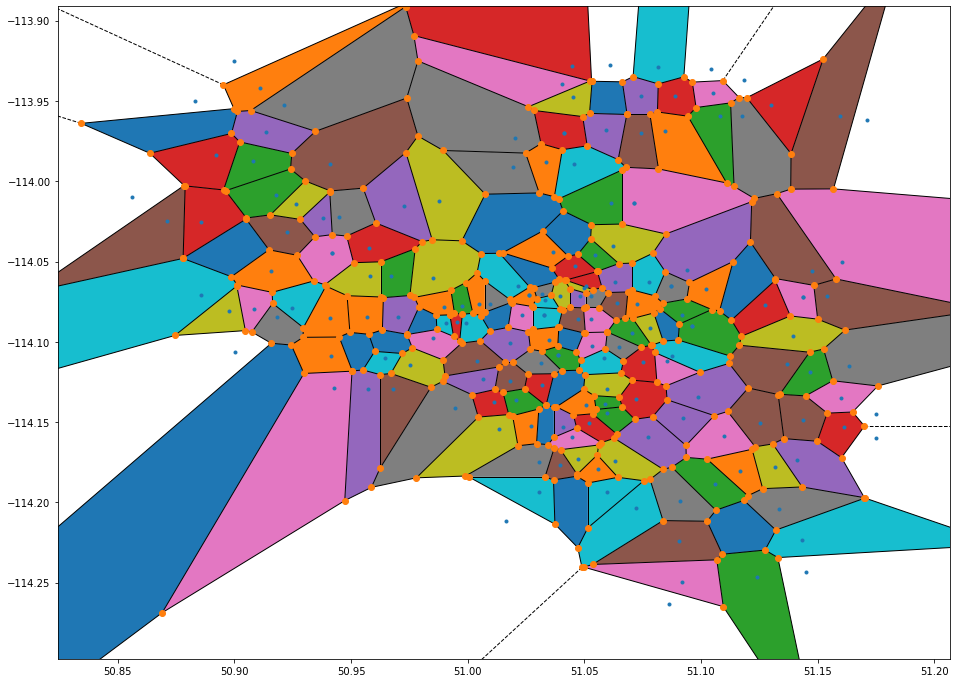

In [24]:
voronoi_plot_2d(vor)
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon))

In this part, I find each bus stop `latitude` and `longitude` in its neighbourhood

In [25]:
reg = []

for p in stop_points: 
    point_index = np.argmin(np.sum((neigh_points - p)**2, axis=1))
    ridges = np.where(vor.ridge_points == point_index)[0]
    vertex_set = set(np.array(vor.ridge_vertices)[ridges, :].ravel())
    region = [x for x in vor.regions if set(x) == vertex_set][0]
    reg.append(region)
print(len(reg))

6309


Creating region dataframe to have number of stops.

In [26]:
reg_df = pd.DataFrame(columns={'number_of_stops':np.nan})

for i in range(stop_df.shape[0]):
    if reg[i] == []:
        reg_df.at[i, 'number_of_stops'] = np.nan
    else:
        reg_df.at[i, 'number_of_stops'] = reg[i]
        
reg_df.dropna()
reg_df.head()

,number_of_stops
0,"[276, 220, 207, 208, 206, 205, 204, 274]"
1,"[281, 277, 278, 279, 280]"
2,"[242, 93, 92, 133, 185, 241]"
3,"[149, 104, 49, 148]"
4,"[149, 104, 49, 148]"


Having number of stops for  each region 

In [27]:
region_df = reg_df.apply(pd.value_counts)
region_df.head()

,number_of_stops
"[256, 157, 156, 155, 8, 135, 133, 92, 255]",119
"[281, 277, 278, 279, 280]",93
"[343, 186, 185, 133, 135, 134, 132, 341]",91
"[242, 93, 92, 133, 185, 241]",81
"[340, 336, 335, 338, 337, 339]",80


Finding name of regions using their region array

In [29]:
df.Neighbourhood = df.Neighbourhood.astype('O')
region_df['Neighbourhood'] = np.nan

for i in range(region_df.shape[0]-1):
    for j, reg in enumerate(vor.regions):
        if region_df.index[i] == reg:
            region_df['Neighbourhood'][i] = df.Neighbourhood.iloc[ind[j]]

/Users/vesal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [30]:
region_df.set_index('Neighbourhood',inplace = True)

In [31]:
region_df.head()

,number_of_stops
Neighbourhood,
Mission,119
Ogden,93
Sundance,91
Mayfair,81
Southview,80


Adding number of stops for each neighbourhood to the dataframe

In [32]:
df['number_of_stops'] = np.nan

for i in range(df.shape[0]):
    for j in range(region_df.shape[0]):
        if df.Neighbourhood[i] == region_df.index[j]:
            df['number_of_stops'][i] = region_df['number_of_stops'][j]
            
df.head()

/Users/vesal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighbourhood,Quadrant,Type,Area,latitude,longitude,number_of_stops
0,Abbeydale,NE/SE,Residential,1.7,51.060833,-113.927778,25.0
1,Acadia,SE,Residential,3.9,50.967222,-114.059167,33.0
2,Albert Park/Radisson Heights,SE,Residential,2.5,51.045556,-113.989444,47.0
3,Altadore,SW,Residential,2.9,51.018056,-114.100556,42.0
4,Applewood Park,SE/NE,Residential,1.6,51.044722,-113.928333,53.0


# 5- Preprocessing Crime dataset 

I used Community Crime and Disorder Statistics data which is publicly available here: 

https://data.calgary.ca/Health-and-Safety/Community-Crime-and-Disorder-Statistics/848s-4m4z, 

to figure out number of crimes per neighbourhood

In [33]:
crime_db = pd.read_csv('Community_Crime_and_Disorder_Statistics.csv')
crime_db.head()

,Sector,Community Name,Group Category,Category,Crime Count,Resident Count,Date,Year,Month,ID,Community Center Point
0,NORTHEAST,WHITEHORN,Crime,Street Robbery,1,12019,09/01/2019 12:00:00 AM,2019,SEP,2019-SEP-WHITEHORN-Street Robbery-1,"(51.08877341271908, -113.97006816364696)"
1,EAST,FOOTHILLS,Crime,Theft OF Vehicle,10,317,11/01/2019 12:00:00 AM,2019,NOV,2019-NOV-FOOTHILLS-Theft OF Vehicle-10,"(50.99416606568998, -113.98198902398701)"
2,SOUTH,ACADIA,Crime,Theft FROM Vehicle,13,10520,09/01/2019 12:00:00 AM,2019,SEP,2019-SEP-ACADIA-Theft FROM Vehicle-13,"(50.972409209651765, -114.05369821963635)"
3,SOUTHEAST,MAHOGANY,Crime,Theft OF Vehicle,1,11784,11/01/2019 12:00:00 AM,2019,NOV,2019-NOV-MAHOGANY-Theft OF Vehicle-1,"(50.89595849748311, -113.92452695887748)"
4,WEST,LINCOLN PARK,Crime,Commercial Break & Enter,5,2617,11/01/2019 12:00:00 AM,2019,NOV,2019-NOV-LINCOLN PARK-Commercial Break & Enter-5,"(51.0100906918158, -114.12955694059636)"


Upper case neighbourhood names in order to find them in crime dataset

In [34]:
df.Neighbourhood = df.Neighbourhood.str.upper()
df.head()

,Neighbourhood,Quadrant,Type,Area,latitude,longitude,number_of_stops
0,ABBEYDALE,NE/SE,Residential,1.7,51.060833,-113.927778,25.0
1,ACADIA,SE,Residential,3.9,50.967222,-114.059167,33.0
2,ALBERT PARK/RADISSON HEIGHTS,SE,Residential,2.5,51.045556,-113.989444,47.0
3,ALTADORE,SW,Residential,2.9,51.018056,-114.100556,42.0
4,APPLEWOOD PARK,SE/NE,Residential,1.6,51.044722,-113.928333,53.0


Adding crime count to the dataframe

In [35]:
df['crime_count'] = np.nan
grouped = crime_db['Crime Count'].groupby(crime_db['Community Name']).sum()

for i , cc in enumerate(grouped):
    for j in range(df.shape[0]):
        if df.Neighbourhood.iloc[j] == grouped.index[i]:
            df['crime_count'][j] = cc
            
df.head()

/Users/vesal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Neighbourhood,Quadrant,Type,Area,latitude,longitude,number_of_stops,crime_count
0,ABBEYDALE,NE/SE,Residential,1.7,51.060833,-113.927778,25.0,4654.0
1,ACADIA,SE,Residential,3.9,50.967222,-114.059167,33.0,10854.0
2,ALBERT PARK/RADISSON HEIGHTS,SE,Residential,2.5,51.045556,-113.989444,47.0,11448.0
3,ALTADORE,SW,Residential,2.9,51.018056,-114.100556,42.0,4556.0
4,APPLEWOOD PARK,SE/NE,Residential,1.6,51.044722,-113.928333,53.0,3421.0


# 6- Scraping Foursquare dataset for Restaurants and Parks

In [36]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

/Users/vesal/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/vesal/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/vesal/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/vesal/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/vesal/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got

Libraries imported.


/Users/vesal/opt/anaconda3/lib/python3.7/site-packages/pkg_resources/__init__.py:1151: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  self, resource_name
/Users/vesal/opt/anaconda3/lib/python3.7/site-packages/branca/colormap.py:29: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/vesal/opt/anaconda3/lib/python3.7/site-packages/branca/_cnames.json'>
  resource_package, resource_path_cnames).read().decode()
/Users/vesal/opt/anaconda3/lib/python3.7/site-packages/branca/colormap.py:33: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/vesal/opt/anaconda3/lib/python3.7/site-packages/branca/_schemes.json'>
  resource_package, resource_path_schemes).read().decode()


`Foursquare Credentials`

In [38]:
CLIENT_ID = 'XLWII1PFOI2UFZ0YAJXIYNIC4FRZN3HZSJX2KW31DDCBCS2S' # your Foursquare ID
CLIENT_SECRET = 'QP2TDLEOJTXIYLW2SFNPQRMK0S2J4MXAIW2DRBYDVR2VKBCA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XLWII1PFOI2UFZ0YAJXIYNIC4FRZN3HZSJX2KW31DDCBCS2S
CLIENT_SECRET:QP2TDLEOJTXIYLW2SFNPQRMK0S2J4MXAIW2DRBYDVR2VKBCA


Scraping Data from `Foursquare API`

In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        pass
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [40]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

calgary_venues = getNearbyVenues(names=df['Neighbourhood'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

In [41]:
print(calgary_venues.shape)
calgary_venues.head(10)

(1184, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ABBEYDALE,51.060833,-113.927778,Vanity Fitness,51.062982,-113.926238,Health & Beauty Service
1,ABBEYDALE,51.060833,-113.927778,Mac's,51.059376,-113.934425,Convenience Store
2,ACADIA,50.967222,-114.059167,The Italian Centre,50.963001,-114.060170,Grocery Store
3,ACADIA,50.967222,-114.059167,Mac's,50.963809,-114.059061,Miscellaneous Shop
4,ACADIA,50.967222,-114.059167,Liquor Depot Fairmont,50.963390,-114.059959,Shop & Service
5,ACADIA,50.967222,-114.059167,Tim Hortons,50.963708,-114.060211,Coffee Shop
6,ALBERT PARK/RADISSON HEIGHTS,51.045556,-113.989444,7-Eleven,51.047371,-113.989308,Convenience Store
7,ALBERT PARK/RADISSON HEIGHTS,51.045556,-113.989444,Swiss Chalet Rotisserie & Grill,51.049300,-113.992411,Swiss Restaurant
8,ALBERT PARK/RADISSON HEIGHTS,51.045556,-113.989444,New Dynasty,51.047540,-113.990004,Asian Restaurant
9,ALBERT PARK/RADISSON HEIGHTS,51.045556,-113.989444,Pink Bamboo Inc,51.047484,-113.989949,Cosmetics Shop


In [42]:
calgary_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ABBEYDALE,2,2,2,2,2,2
ACADIA,4,4,4,4,4,4
ALBERT PARK/RADISSON HEIGHTS,4,4,4,4,4,4
ALTADORE,1,1,1,1,1,1
APPLEWOOD PARK,4,4,4,4,4,4
ARBOUR LAKE,4,4,4,4,4,4
ASPEN WOODS,1,1,1,1,1,1
AUBURN BAY,3,3,3,3,3,3
BANFF TRAIL,5,5,5,5,5,5


In [43]:
print('There are {} uniques categories.'.format(len(calgary_venues['Venue Category'].unique())))

There are 188 uniques categories.


In [44]:
# one hot encoding
calgary_onehot = pd.get_dummies(calgary_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
calgary_onehot['Neighborhood'] = calgary_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [calgary_onehot.columns[-1]] + list(calgary_onehot.columns[:-1])
calgary_onehot = calgary_onehot[fixed_columns]

calgary_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Garden,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Candy Store,Casino,Cheese Shop,Child Care Service,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Dry Cleaner,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Food & Drink Shop,Food Court,Food Service,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Noodle House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Paintball Field,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Real Estate Office,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Soccer Field,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stables,Stadium,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ABBEYDALE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ABBEYDALE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ACADIA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [45]:
calgary_onehot.shape

(1184, 188)

In [46]:
calgary_grouped = calgary_onehot.groupby('Neighborhood').mean().reset_index()
calgary_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Garden,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Candy Store,Casino,Cheese Shop,Child Care Service,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Dry Cleaner,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Food & Drink Shop,Food Court,Food Service,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Museum,Music Store,Music Venue,Nightclub,Noodle House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Paintball Field,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Real Estate Office,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Soccer Field,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stables,Stadium,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,ABBEYDALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ACADIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,

Finding 10 most common venues in each neighbourhood

In [47]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [48]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = calgary_grouped['Neighborhood']

for ind in np.arange(calgary_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(calgary_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ABBEYDALE,Convenience Store,Health & Beauty Service,Women's Store,Financial or Legal Service,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Forest,Food Truck,Food Service
1,ACADIA,Miscellaneous Shop,Grocery Store,Coffee Shop,Shop & Service,Women's Store,Financial or Legal Service,Fried Chicken Joint,French Restaurant,Forest,Food Truck
2,ALBERT PARK/RADISSON HEIGHTS,Cosmetics Shop,Convenience Store,Asian Restaurant,Swiss Restaurant,Women's Store,Financial or Legal Service,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Forest
3,ALTADORE,Massage Studio,Women's Store,Gift Shop,Gas Station,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Forest,Food Truck,Food Service
4,APPLEWOOD PARK,Park,Pizza Place,Home Service,Liquor Store,Women's Store,Fried Chicken Joint,French Restaurant,Forest,Food Truck,Food Service


In [49]:
neighborhoods_venues_sorted.shape

(186, 11)

Specifying some terms to count each venue as parks and restaurants

In [50]:
restaurant = ['Pub','Coffee','Food','Restaurant','Pizza','Burger','Chicken','Café','Sandwich','Taco',
              'Ice Cream','Bakery','Breakfast','Lunch','Dinner','BBQ','Noodle','Falafel','Bar']
nature = ['Park','Forest','Lake']

Calculating restaurants for each neighbourhood

In [51]:
res = 0
total_res =[]
for j in range(neighborhoods_venues_sorted.shape[0]):
    for i in range(neighborhoods_venues_sorted.shape[1]-1):
        for kind in restaurant:
            if kind in neighborhoods_venues_sorted.iloc[j][i+1]:
                res+=1
    total_res.append(res)
    res = 0
print(total_res)

[4, 4, 4, 4, 5, 7, 5, 4, 4, 6, 4, 5, 5, 7, 3, 7, 6, 8, 6, 4, 6, 6, 4, 3, 5, 4, 7, 6, 3, 6, 9, 4, 5, 8, 3, 4, 6, 5, 7, 7, 3, 4, 6, 4, 4, 4, 3, 4, 5, 5, 4, 6, 3, 5, 5, 7, 4, 5, 5, 5, 5, 3, 2, 5, 7, 7, 7, 5, 5, 7, 7, 4, 4, 6, 4, 8, 7, 6, 4, 4, 5, 6, 4, 6, 7, 3, 6, 4, 4, 7, 7, 4, 5, 6, 4, 5, 7, 4, 5, 5, 6, 5, 8, 4, 4, 6, 7, 6, 4, 6, 6, 5, 3, 5, 6, 5, 7, 6, 5, 3, 5, 5, 4, 8, 5, 7, 4, 4, 7, 5, 5, 5, 7, 6, 2, 5, 6, 4, 4, 4, 7, 4, 7, 7, 5, 6, 5, 6, 6, 6, 4, 6, 6, 5, 4, 7, 4, 5, 6, 6, 5, 5, 7, 4, 8, 4, 6, 4, 4, 3, 6, 4, 5, 4, 4, 6, 6, 5, 4, 6, 5, 5, 5, 4, 6, 4]


Calculating parks for each neighbourhood

In [52]:
na = 0
total_nature =[]
for j in range(neighborhoods_venues_sorted.shape[0]):
    for i in range(neighborhoods_venues_sorted.shape[1]-1):
        for kind in nature:
            if kind in neighborhoods_venues_sorted.iloc[j][i+1]:
                res+=1
    total_nature.append(res)
    res = 0
print(total_nature)

[1, 1, 1, 1, 2, 1, 1, 3, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1]


Adding parks and restaurants to the dataframe

In [53]:
df['number_of_parks'] = np.nan
df['number_of_restaurants'] = np.nan
for i in range(df.shape[0]):
    for j in range(neighborhoods_venues_sorted.shape[0]):
        if df.Neighbourhood.iloc[i] == neighborhoods_venues_sorted.Neighborhood.iloc[j]:
            df['number_of_parks'].iloc[i] = total_nature[j]
            df['number_of_restaurants'].iloc[i] = total_res[j]

df.head()

/Users/vesal/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Neighbourhood,Quadrant,Type,Area,latitude,longitude,number_of_stops,crime_count,number_of_parks,number_of_restaurants
0,ABBEYDALE,NE/SE,Residential,1.7,51.060833,-113.927778,25.0,4654.0,1.0,4.0
1,ACADIA,SE,Residential,3.9,50.967222,-114.059167,33.0,10854.0,1.0,4.0
2,ALBERT PARK/RADISSON HEIGHTS,SE,Residential,2.5,51.045556,-113.989444,47.0,11448.0,1.0,4.0
3,ALTADORE,SW,Residential,2.9,51.018056,-114.100556,42.0,4556.0,1.0,4.0
4,APPLEWOOD PARK,SE/NE,Residential,1.6,51.044722,-113.928333,53.0,3421.0,2.0,5.0


Replacing `Nan` Values with 0 because it means there were no data on Forsquare about them, so non of them found. 

In [54]:
df.fillna(0, inplace = True)
df.head()

,Neighbourhood,Quadrant,Type,Area,latitude,longitude,number_of_stops,crime_count,number_of_parks,number_of_restaurants
0,ABBEYDALE,NE/SE,Residential,1.7,51.060833,-113.927778,25.0,4654.0,1.0,4.0
1,ACADIA,SE,Residential,3.9,50.967222,-114.059167,33.0,10854.0,1.0,4.0
2,ALBERT PARK/RADISSON HEIGHTS,SE,Residential,2.5,51.045556,-113.989444,47.0,11448.0,1.0,4.0
3,ALTADORE,SW,Residential,2.9,51.018056,-114.100556,42.0,4556.0,1.0,4.0
4,APPLEWOOD PARK,SE/NE,Residential,1.6,51.044722,-113.928333,53.0,3421.0,2.0,5.0


# 7- Analyzing Final Dataframe

### Analyze 1: Normalazing all data and calculating score for each neighbour


In this part, after normalyzing the values, I calculated the mean of all rows as their score to compare. 

In [59]:
from sklearn import preprocessing

num_stops = df['number_of_stops'].values #returns a numpy array
num_stops = num_stops.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
stops_scaled = min_max_scaler.fit_transform(num_stops)
df_stops = pd.DataFrame(stops_scaled*10)
df_stops.head()

,0
0,2.100840
1,2.773109
2,3.949580
3,3.529412
4,4.453782


In [60]:
crime_rate = df['crime_count'].values
crime_rate = crime_rate.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
crime_scaled = min_max_scaler.fit_transform(crime_rate)
df_crimes = pd.DataFrame(10 - crime_scaled*10)

df_crimes.head()

,0
0,9.300098
1,8.367697
2,8.278367
3,9.314836
4,9.485525


In [61]:
# df_stops[:10].plot(kind='bar')

In [62]:
park_rate = df['crime_count'].values
park_rate = park_rate.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
park_scaled = min_max_scaler.fit_transform(park_rate)
df_parks = pd.DataFrame(park_scaled*10)

df_parks.head()

,0
0,0.699902
1,1.632303
2,1.721633
3,0.685164
4,0.514475


In [63]:
restaurant_rate = df['crime_count'].values
restaurant_rate = restaurant_rate.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
restaurant_scaled = min_max_scaler.fit_transform(restaurant_rate)
df_restaurants = pd.DataFrame(restaurant_scaled*10)

df_restaurants.head()

,0
0,0.699902
1,1.632303
2,1.721633
3,0.685164
4,0.514475


In [64]:
ndf = df
ndf.drop(['Quadrant','Type','latitude','longitude','Area'], inplace = True ,axis = 1)
for i in range(ndf.shape[0]):
    ndf['number_of_stops'].iloc[i] = df_stops.iloc[i][0]
    ndf['crime_count'].iloc[i] = df_crimes.iloc[i][0]
    ndf['number_of_parks'].iloc[i] = df_parks.iloc[i][0]
    ndf['number_of_restaurants'].iloc[i] = df_restaurants.iloc[i][0]
ndf['Total_Score'] = ndf.mean(axis=1)
ndf.head()

/Users/vesal/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Neighbourhood,number_of_stops,crime_count,number_of_parks,number_of_restaurants,Total_Score
0,ABBEYDALE,2.100840,9.300098,0.699902,0.699902,3.200186
1,ACADIA,2.773109,8.367697,1.632303,1.632303,3.601353
2,ALBERT PARK/RADISSON HEIGHTS,3.949580,8.278367,1.721633,1.721633,3.917803
3,ALTADORE,3.529412,9.314836,0.685164,0.685164,3.553644
4,APPLEWOOD PARK,4.453782,9.485525,0.514475,0.514475,3.742064


In [65]:
final_ndf = ndf.sort_values('Total_Score' , ascending = False)
final_ndf.reset_index(inplace = True)
final_ndf.drop('index',inplace=True,axis=1)
final_ndf.head()

,Neighbourhood,number_of_stops,crime_count,number_of_parks,number_of_restaurants,Total_Score
0,BELTLINE,2.352941,0.000000,10.000000,10.000000,5.588235
1,MISSION,10.000000,8.978570,1.021430,1.021430,5.255358
2,DOWNTOWN COMMERCIAL CORE,1.260504,2.025415,7.974585,7.974585,4.808772
3,OGDEN,7.815126,8.822017,1.177983,1.177983,4.748277
4,SUNDANCE,7.647059,9.579066,0.420934,0.420934,4.516998


In [237]:
#final_ndf.set_index('Neighbourhood', inplace = True)
fdf = final_ndf[:10]

fdf.set_index('Neighbourhood', inplace = True)
fdf

,number_of_stops,crime_count,number_of_parks,number_of_restaurants,Total_Score
Neighbourhood,,,,,
BELTLINE,2.352941,0.000000,10.000000,10.000000,5.588235
MISSION,10.000000,8.978570,1.021430,1.021430,5.255358
DOWNTOWN COMMERCIAL CORE,1.260504,2.025415,7.974585,7.974585,4.808772
OGDEN,7.815126,8.822017,1.177983,1.177983,4.748277
SUNDANCE,7.647059,9.579066,0.420934,0.420934,4.516998
SOUTHVIEW,6.722689,9.182645,0.817355,0.817355,4.385011
CANYON MEADOWS,6.470588,9.447477,0.552523,0.552523,4.255778
MOUNT PLEASANT,6.218487,9.263554,0.736446,0.736446,4.238733
ST. ANDREWS HEIGHTS,6.554622,9.685691,0.314309,0.314309,4.217233


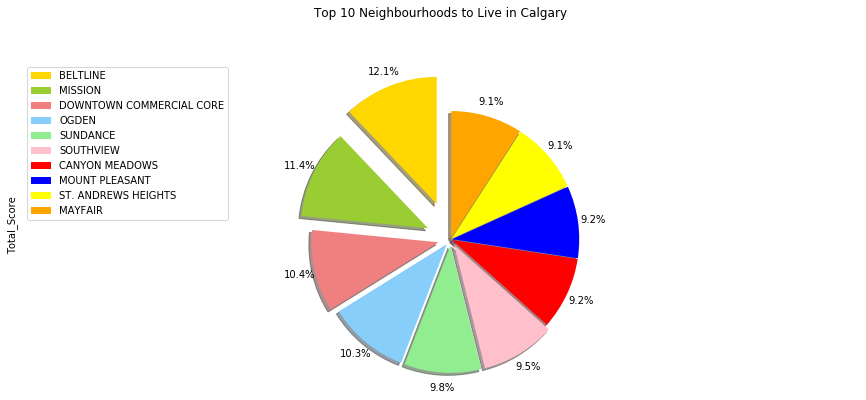

In [238]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'red' , 'blue' , 'yellow', 'orange']
explode_list = [0.3, 0.2, 0.1, 0.05, 0.05, 0.05 , 0.01 , 0.01 , 0.01 , 0.01 ] # ratio for each continent with which to offset each wedge.

fdf['Total_Score'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Top 10 Neighbourhoods to Live in Calgary', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=fdf.index, loc='upper left') 

plt.show()

And that's it! As it is shown, the top 10 neighbourhoods in Calgary to live are as shown above! 

### Analyze 2: Clustering all data to suggest similar neighbourhoods

Clustering the neighbourhoods to see what neighbourhoods are similar due to mentioned four features

In [243]:
# set number of clusters
kclusters = 10

calgary_gr = final_ndf.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(calgary_gr)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_

len(labels)

194

In [244]:
dftest = df
dftest.head()

,Cluster Labels,number_of_stops,crime_count,number_of_parks,number_of_restaurants,Total_Score
Neighbourhood,,,,,,
ABBEYDALE,2,2.100840,9.300098,0.699902,0.699902,3.200186
ACADIA,8,2.773109,8.367697,1.632303,1.632303,3.601353
ALBERT PARK/RADISSON HEIGHTS,2,3.949580,8.278367,1.721633,1.721633,3.917803
ALTADORE,8,3.529412,9.314836,0.685164,0.685164,3.553644
APPLEWOOD PARK,8,4.453782,9.485525,0.514475,0.514475,3.742064


In [246]:
# add clustering labels
#dftest.insert(0, 'Labels', kmeans.labels_)

calgary_df = df

#calgary_df.set_index('Neighbourhood',inplace=True)
#calgary_df.drop('Labels',axis=1,inplace=True)
calgary_df.head() # check the last columns!

,Cluster Labels,number_of_stops,crime_count,number_of_parks,number_of_restaurants,Total_Score
Neighbourhood,,,,,,
ABBEYDALE,2,2.100840,9.300098,0.699902,0.699902,3.200186
ACADIA,8,2.773109,8.367697,1.632303,1.632303,3.601353
ALBERT PARK/RADISSON HEIGHTS,2,3.949580,8.278367,1.721633,1.721633,3.917803
ALTADORE,8,3.529412,9.314836,0.685164,0.685164,3.553644
APPLEWOOD PARK,8,4.453782,9.485525,0.514475,0.514475,3.742064


### Find Similar Neighbourhoods Using Clusters

Now, I examine each cluster and determine the discriminating venue categories that distinguish each cluster.

#### Clusters for top 10 Neighbourhoods 

By iterating through the dataframe, we can see similar neighbourhoods to the best 10 neighbourhoods in terms of all our four criteria.

In [236]:
for i in range(fdf.shape[0]):
    for j in range(calgary_df.shape[0]):
        if calgary_df.index[j] == fdf.Neighbourhood[i]:
            neigh1 = calgary_df.loc[calgary_df['Cluster Labels'] == calgary_df['Cluster Labels'].iloc[j]]
            print('Similar Neighbourhoods to ', fdf.Neighbourhood[i], 'are:')
            print(neigh1.index)
            print('-'*40)

Similar Neighbourhoods to  BELTLINE are:
Index(['BAYVIEW', 'BEL-AIRE', 'BELTLINE', 'BONAVISTA DOWNS', 'BOWNESS',
       'BRIDGELAND/RIVERSIDE', 'BRIDLEWOOD', 'CAMBRIAN HEIGHTS',
       'CAPITOL HILL', 'CHARLESWOOD', 'CHINOOK PARK', 'COLLINGWOOD',
       'COPPERFIELD'],
      dtype='object', name='Neighbourhood')
----------------------------------------
Similar Neighbourhoods to  MISSION are:
Index(['MAPLE RIDGE', 'MARLBOROUGH PARK', 'MAYFAIR', 'MCKENZIE LAKE',
       'MCKENZIE TOWNE', 'MEADOWLARK PARK', 'MIDNAPORE', 'MILLRISE', 'MISSION',
       'MONTEREY PARK', 'MONTGOMERY', 'MOUNT PLEASANT', 'NEW BRIGHTON',
       'NOLAN HILL', 'NORTH GLENMORE PARK', 'NORTH HAVEN', 'NORTH HAVEN UPPER',
       'OAKRIDGE', 'PALLISER', 'PANORAMA HILLS', 'PARKHILL', 'PARKLAND',
       'PATTERSON', 'PENBROOKE MEADOWS', 'PINERIDGE', 'POINT MCKAY',
       'PUMP HILL', 'QUEENS PARK VILLAGE', 'QUEENSLAND', 'RAMSAY',
       'RANCHLANDS', 'RED CARPET', 'REDSTONE', 'RENFREW', 'RICHMOND',
       'RIDEAU PARK', 'R